In [1]:
#first import the libraries

import pandas as pd 
import numpy as np


In [2]:
#import the first dataset. This is the train dataset. This data set is used to train the model. The target column is the number of orders
train_data= pd.read_csv("D:/Fourth semester/AI/Food_demand_project/train.csv")

In [3]:
#read first five lines
train_data.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:

#get basic understanding about the training datset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
#read the other two datasets. These data sets have the data about the center and the meal. For prediction we usually need the type not the id. 
meal_info= pd.read_csv("D:/Fourth semester/AI/Food_demand_project/meal_info.csv")
fulfilment_center_info = pd.read_csv("D:/Fourth semester/AI/Food_demand_project/fulfilment_center_info.csv")

meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


Lets connect these two tables and create a meaning ful train data set

In [7]:
train_data_final = pd.merge(train_data, meal_info, on="meal_id", how="outer")
train_data_final = pd.merge(train_data_final, fulfilment_center_info, on="center_id", how="outer")
train_data_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


The center_id or meal_id does not have any impact on the prediction . so lets drop that

In [8]:
train_data_final = train_data_final.drop(['center_id', 'meal_id'], axis=1)
train_data_final.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Lets reorder the table column order . Ususally the target column should be in the last

In [9]:
# get the column headings into a list

cols = train_data_final.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [10]:
# change the order and send the target column into the end

cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [11]:
# New train data set

train_data_final = train_data_final[cols]
train_data_final.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [12]:
train_data_final.dtypes


id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

According to the data types there are some categorical data columns. So we need to convert them in to numerical data as many model requires numerical data.
We are going to convert "center_type" , "category" , "cuisine" into the numerical data type

In [13]:
# identify how many categories in each columns we need to convert

center_type_column = "center_type"  
category_column = "category"
cuisine_column = "cuisine"

# Count the number of unique categories in the specified column
center_type_count = train_data_final[center_type_column].nunique()
category_count = train_data_final[category_column].nunique()
cuisine_count = train_data_final[cuisine_column].nunique()

print(f"Number of unique categories in center_type : {center_type_count}")
print(f"Number of unique categories in category : {category_count}")
print(f"Number of unique categories in cuisine : {cuisine_count}")

Number of unique categories in center_type : 3
Number of unique categories in category : 14
Number of unique categories in cuisine : 4



As we can see there are many types on categories. So we can use binary encoding fo that column and for others we can use one-hot encoding

In [14]:
#install dependency
!pip install category_encoders

In [15]:
#check for null values
print(train_data_final[['category', 'center_type', 'cuisine']].isnull().sum())

category       0
center_type    0
cuisine        0
dtype: int64


In [16]:
import category_encoders as ce
# Binary encoding for the 'category' column
binary_encoder = ce.BinaryEncoder(cols=['category'])
train_data_final = binary_encoder.fit_transform(train_data_final)

# One-hot encoding for the 'center_type' and 'cuisine' columns
train_data_final = pd.get_dummies(train_data_final, columns=['center_type', 'cuisine'])

# Convert boolean columns to 1 and 0
train_data_final = train_data_final.astype(int)

# View the transformed data
print(train_data_final.head())

        id  week  city_code  region_code  op_area  category_0  category_1  \
0  1379560     1        647           56        2           0           0   
1  1018704     2        647           56        2           0           0   
2  1196273     3        647           56        2           0           0   
3  1116527     4        647           56        2           0           0   
4  1343872     5        647           56        2           0           0   

   category_2  category_3  checkout_price  ...  emailer_for_promotion  \
0           0           1             136  ...                      0   
1           0           1             135  ...                      0   
2           0           1             132  ...                      0   
3           0           1             135  ...                      0   
4           0           1             146  ...                      0   

   homepage_featured  num_orders  center_type_TYPE_A  center_type_TYPE_B  \
0                  0  

In [17]:
train_data_final.to_csv("D:/Fourth semester/AI/Food_demand_project/FinalDataset.csv", index=False)


We have multiple rows for the same week, but each row will represent a different combination of features 

In [18]:
train_data_final.dtypes


id                       int32
week                     int32
city_code                int32
region_code              int32
op_area                  int32
category_0               int32
category_1               int32
category_2               int32
category_3               int32
checkout_price           int32
base_price               int32
emailer_for_promotion    int32
homepage_featured        int32
num_orders               int32
center_type_TYPE_A       int32
center_type_TYPE_B       int32
center_type_TYPE_C       int32
cuisine_Continental      int32
cuisine_Indian           int32
cuisine_Italian          int32
cuisine_Thai             int32
dtype: object

# DATA VISUALIZING

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


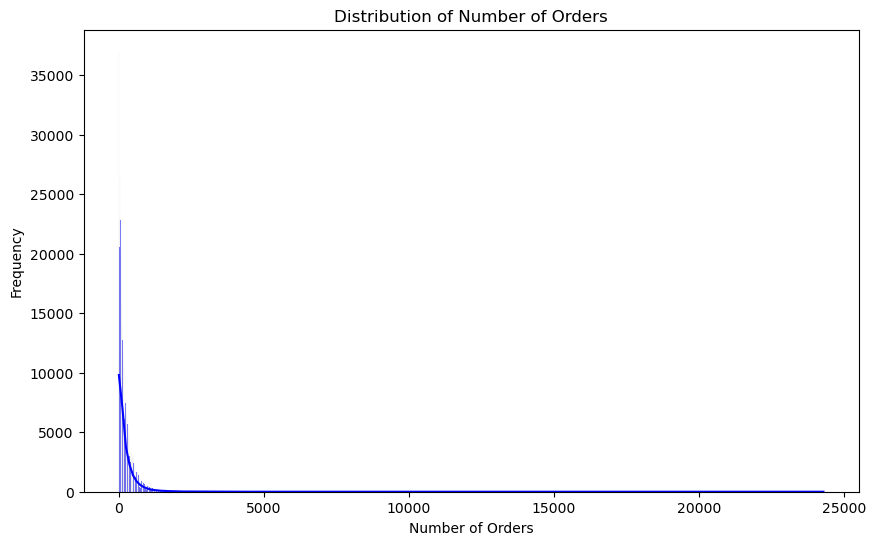

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_data_final['num_orders'], kde=True, color='blue')
plt.title('Distribution of Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

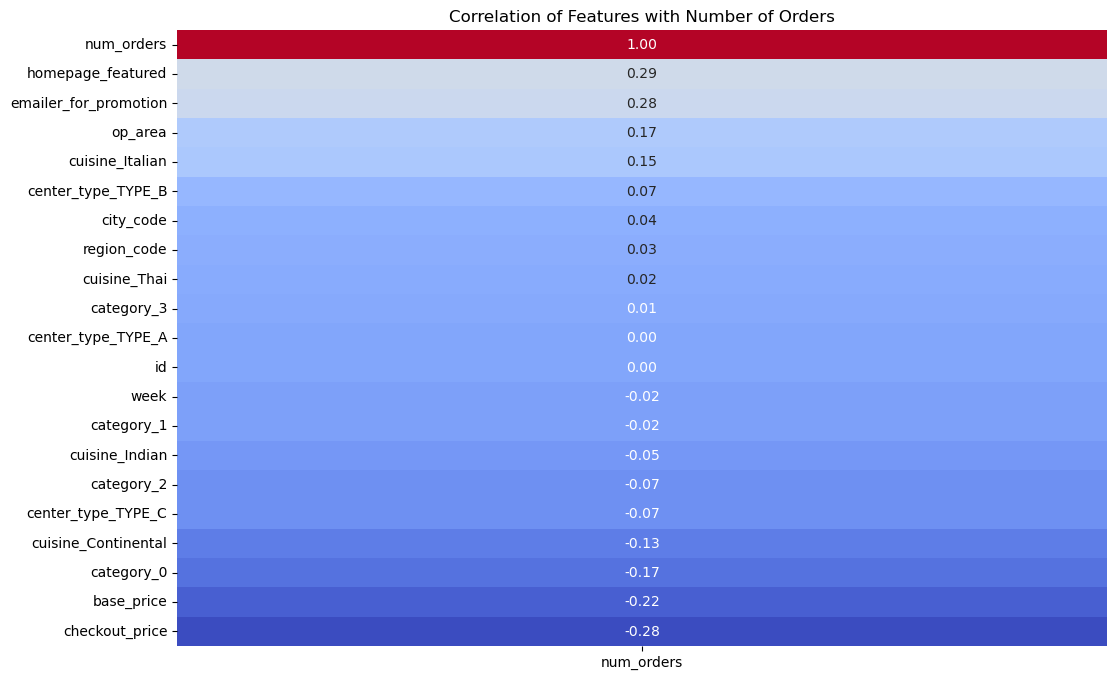

In [20]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_data_final.corr()
sns.heatmap(correlation_matrix[['num_orders']].sort_values(by='num_orders', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Correlation of Features with Number of Orders')
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


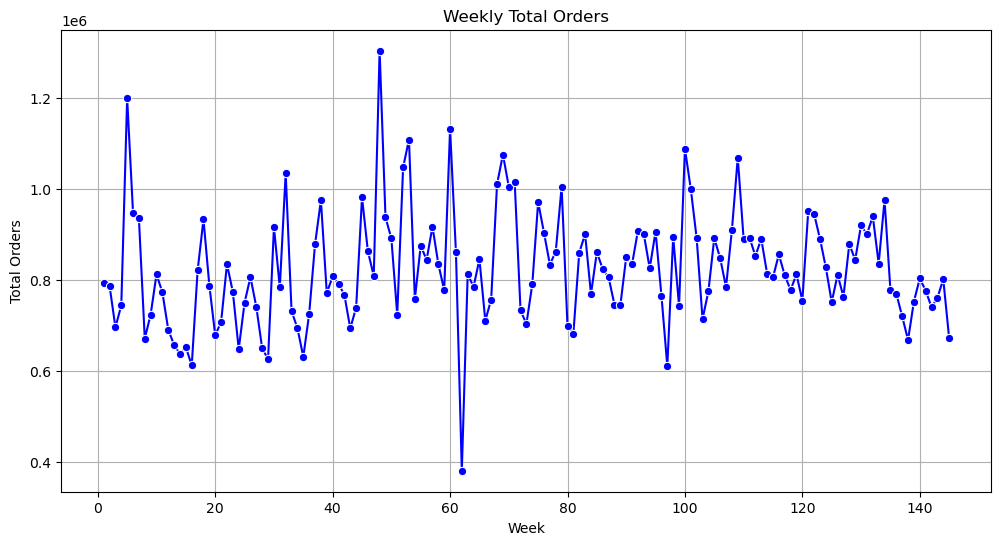

In [21]:
weekly_orders = train_data_final.groupby('week')['num_orders'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_orders, x='week', y='num_orders', marker='o', color='blue')
plt.title('Weekly Total Orders')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()


The total orders appear to fluctuate significantly week to week.
There isn’t a clear, consistent upward or downward trend over the entire time frame, indicating that demand may be driven by other factors

Here we have created the lag field. For each row, the lag feature will contain the value of num_orders from the previous week. This helps the model understand how past values of num_orders affect the current value.

In [22]:
import pandas as pd

# Drop the 'id' column
train_data_final = train_data_final.drop(columns=["id"])

# Ensure the data is sorted by 'week' for correct temporal order (if needed)
train_data_final = train_data_final.sort_values(by=["week"])

# Create lag field for 'num_orders'
train_data_final["num_orders_lag1"] = train_data_final["num_orders"].shift(1)

# Verify the result
print(train_data_final.head())


        week  city_code  region_code  op_area  category_0  category_1  \
0          1        647           56        2           0           0   
284804     1        680           77        4           1           0   
285005     1        680           77        4           1           0   
285106     1        680           77        4           1           0   
43263      1        685           56        5           0           0   

        category_2  category_3  checkout_price  base_price  ...  \
0                0           1             136         152  ...   
284804           0           1             658         660  ...   
285005           1           0             244         282  ...   
285106           1           0             242         280  ...   
43263            0           1             247         247  ...   

        homepage_featured  num_orders  center_type_TYPE_A  center_type_TYPE_B  \
0                       0         177                   0                   0

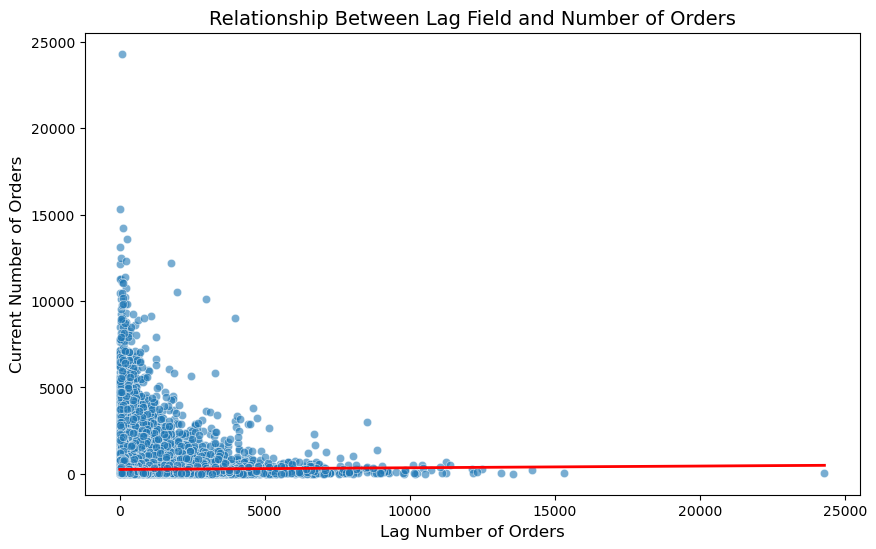

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot between 'lag_num_orders' and 'num_orders'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_final, x='num_orders_lag1', y='num_orders', alpha=0.6)

# Add a regression line (optional)
sns.regplot(data=train_data_final, x='num_orders_lag1', y='num_orders', scatter=False, color='red', line_kws={"linewidth": 2})

# Adding titles and labels
plt.title('Relationship Between Lag Field and Number of Orders', fontsize=14)
plt.xlabel('Lag Number of Orders', fontsize=12)
plt.ylabel('Current Number of Orders', fontsize=12)

# Display the plot
plt.show()

This graph suggests that there's only a very weak relationship between the number of orders in a previous period and the number of orders in the current period. While there's a slight tendency for more past orders to be associated with slightly more current orders, the effect is minimal and not a strong predictor. Other factors are likely playing a much more significant role in determining the number of current orders.

In [24]:
# Create a new column for the price difference
train_data_final['price_difference'] = train_data_final['checkout_price'] - train_data_final['base_price']

# Display the first few rows to verify the new column
print(train_data_final[['base_price', 'checkout_price', 'price_difference']].head())

        base_price  checkout_price  price_difference
0              152             136               -16
284804         660             658                -2
285005         282             244               -38
285106         280             242               -38
43263          247             247                 0


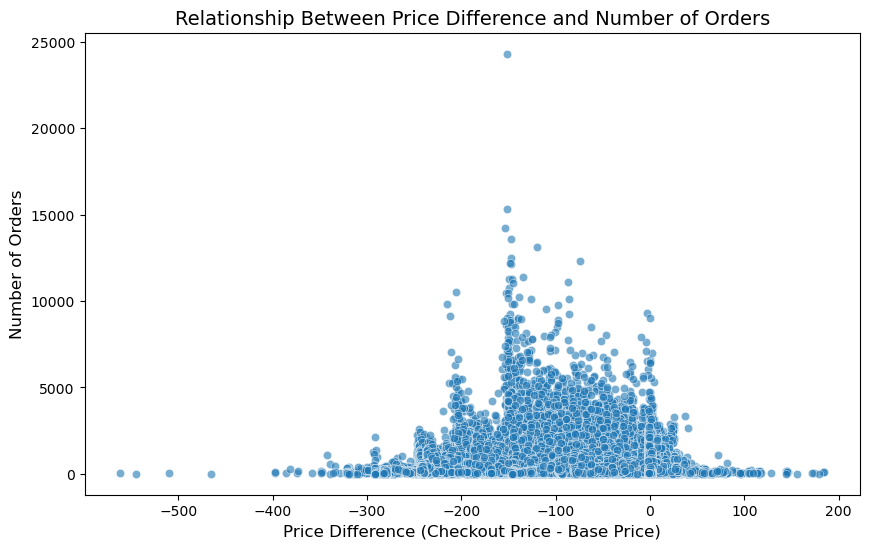

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot between 'price_difference' and 'num_orders'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_final, x='price_difference', y='num_orders', alpha=0.6)

# Adding titles and labels
plt.title('Relationship Between Price Difference and Number of Orders', fontsize=14)
plt.xlabel('Price Difference (Checkout Price - Base Price)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Display the plot
plt.show()


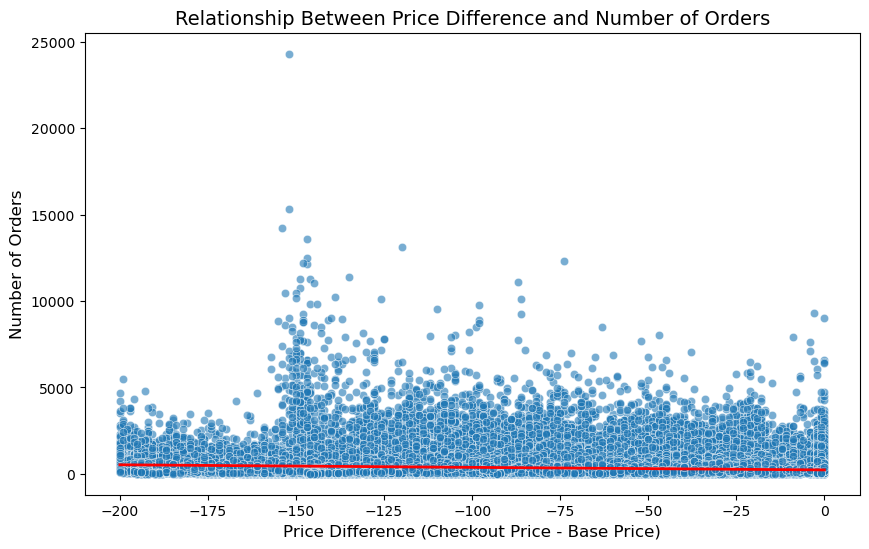

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to focus on the -200 to 0 price difference range
filtered_data = train_data_final[(train_data_final['price_difference'] >= -200) & (train_data_final['price_difference'] <= 0)]

# Create a scatter plot with filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='price_difference', y='num_orders', alpha=0.6)

# Add a regression line (optional)
sns.regplot(data=filtered_data, x='price_difference', y='num_orders', scatter=False, color='red', line_kws={"linewidth": 2})

# Adding titles and labels
plt.title('Relationship Between Price Difference and Number of Orders', fontsize=14)
plt.xlabel('Price Difference (Checkout Price - Base Price)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Display the plot
plt.show()


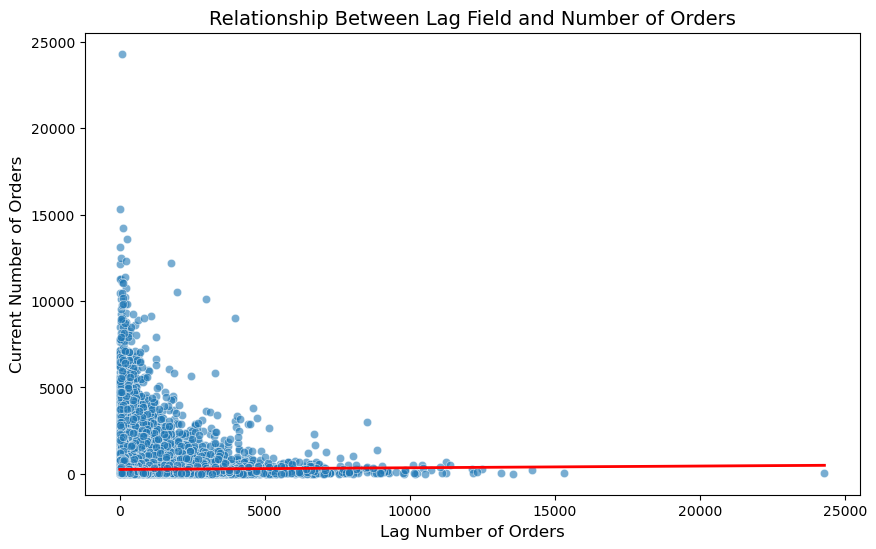

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot between 'lag_num_orders' and 'num_orders'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_final, x='num_orders_lag1', y='num_orders', alpha=0.6)

# Add a regression line (optional)
sns.regplot(data=train_data_final, x='num_orders_lag1', y='num_orders', scatter=False, color='red', line_kws={"linewidth": 2})

# Adding titles and labels
plt.title('Relationship Between Lag Field and Number of Orders', fontsize=14)
plt.xlabel('Lag Number of Orders', fontsize=12)
plt.ylabel('Current Number of Orders', fontsize=12)

# Display the plot
plt.show()


In [28]:
print(train_data_final.head())


        week  city_code  region_code  op_area  category_0  category_1  \
0          1        647           56        2           0           0   
284804     1        680           77        4           1           0   
285005     1        680           77        4           1           0   
285106     1        680           77        4           1           0   
43263      1        685           56        5           0           0   

        category_2  category_3  checkout_price  base_price  ...  num_orders  \
0                0           1             136         152  ...         177   
284804           0           1             658         660  ...          14   
285005           1           0             244         282  ...          14   
285106           1           0             242         280  ...         121   
43263            0           1             247         247  ...          81   

        center_type_TYPE_A  center_type_TYPE_B  center_type_TYPE_C  \
0               

In [29]:
train_data_final.dtypes

week                       int32
city_code                  int32
region_code                int32
op_area                    int32
category_0                 int32
category_1                 int32
category_2                 int32
category_3                 int32
checkout_price             int32
base_price                 int32
emailer_for_promotion      int32
homepage_featured          int32
num_orders                 int32
center_type_TYPE_A         int32
center_type_TYPE_B         int32
center_type_TYPE_C         int32
cuisine_Continental        int32
cuisine_Indian             int32
cuisine_Italian            int32
cuisine_Thai               int32
num_orders_lag1          float64
price_difference           int32
dtype: object

In [30]:
# Drop the 'num_orders_lag1' column
train_data_final = train_data_final.drop(columns=['num_orders_lag1'])

# Reorder the columns
new_column_order = [
    'week', 'city_code', 'region_code', 'op_area',
    'category_0', 'category_1', 'category_2', 'category_3',
    'checkout_price', 'base_price', 'emailer_for_promotion',
    'homepage_featured', 'center_type_TYPE_A', 'center_type_TYPE_B',
    'center_type_TYPE_C', 'cuisine_Continental', 'cuisine_Indian',
    'cuisine_Italian', 'cuisine_Thai', 'price_difference', 'num_orders'
]

# Apply the new order
train_data_final = train_data_final[new_column_order]

# Verify the new order
print(train_data_final.dtypes)


week                     int32
city_code                int32
region_code              int32
op_area                  int32
category_0               int32
category_1               int32
category_2               int32
category_3               int32
checkout_price           int32
base_price               int32
emailer_for_promotion    int32
homepage_featured        int32
center_type_TYPE_A       int32
center_type_TYPE_B       int32
center_type_TYPE_C       int32
cuisine_Continental      int32
cuisine_Indian           int32
cuisine_Italian          int32
cuisine_Thai             int32
price_difference         int32
num_orders               int32
dtype: object


# TRAIN THE MODEL

In [31]:
# Separate num_orders as the target (dependent variable) and Keep the rest as input features (independent variables).
X = train_data_final.drop(columns=['num_orders'])  # Features
y = train_data_final['num_orders']  # Target


In [32]:
# Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Essential Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# For Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


Linear Regression MAE: 196.3054266194918
Linear Regression MSE: 125467.45134795466
Linear Regression R²: 0.24768800777269917


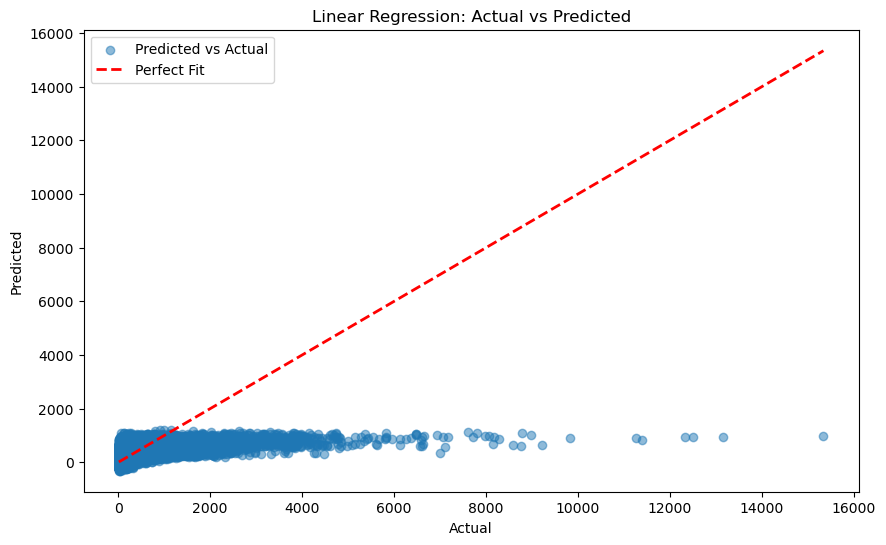

In [34]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R²: {lr_r2}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


Random Forest MAE: 86.40509456558087
Random Forest MSE: 33187.266138403684
Random Forest R²: 0.801006730933591


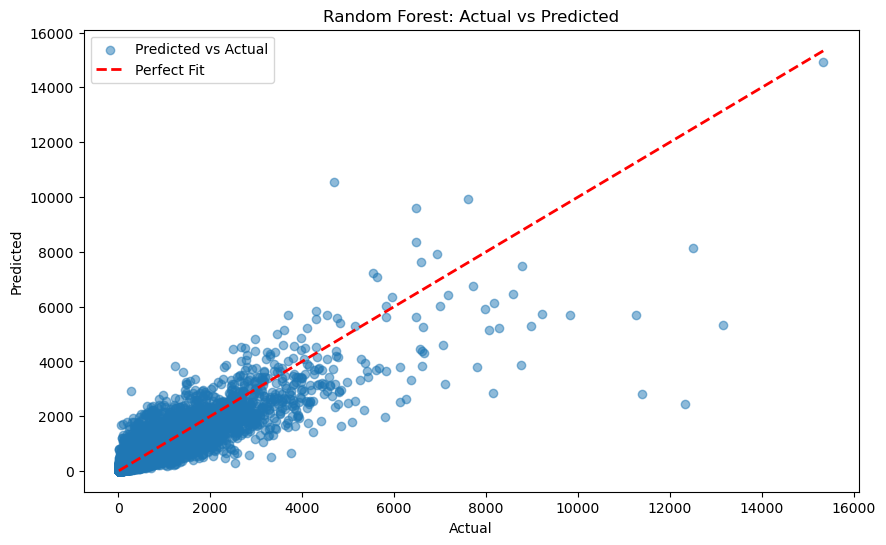

In [35]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R²: {rf_r2}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 365238, number of used features: 20
[LightGBM] [Info] Start training from score 261.466696
LightGBM MAE: 104.9307263503819
LightGBM MSE: 40576.988125143165
LightGBM R²: 0.7566974187564254


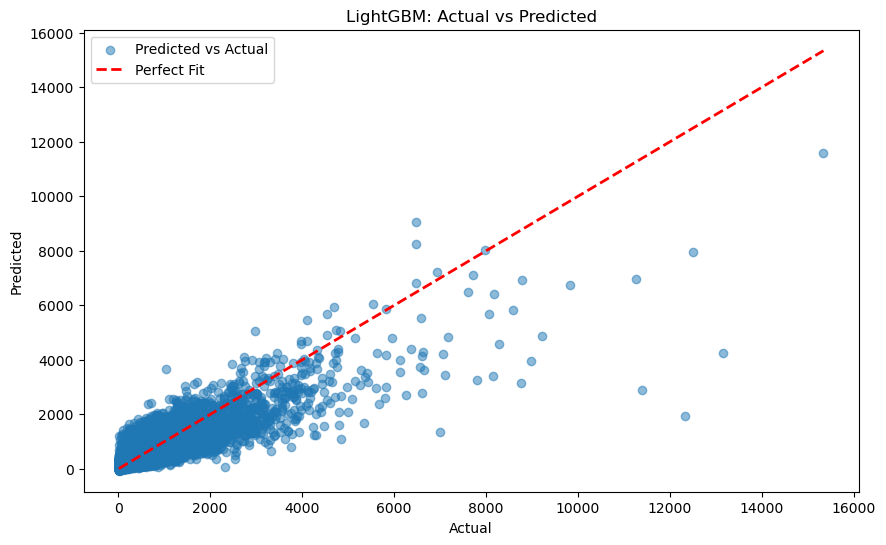

In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# LightGBM Model
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"LightGBM MAE: {lgbm_mae}")
print(f"LightGBM MSE: {lgbm_mse}")
print(f"LightGBM R²: {lgbm_r2}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LightGBM: Actual vs Predicted')
plt.legend()
plt.show()


XGBoost MAE: 95.69382591763281
XGBoost MSE: 34490.43247547903
XGBoost R²: 0.7931928504991361


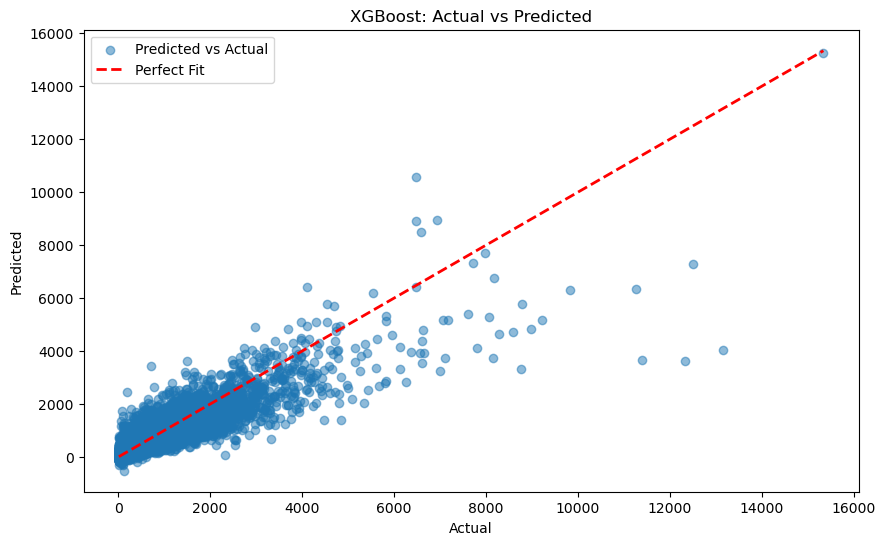

In [36]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R²: {xgb_r2}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.legend()
plt.show()


Hyperparameter testing

In [38]:
pip install hyperopt


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 131.3 kB/s eta 0:00:12
    --------------------------------------- 0.0/1.6 MB 131.3 kB/s eta 0:00:12
    --------------------------------------- 0.0/1.6 MB 146.3 kB/s eta 0:00:11
   - -------------------------------------- 0.0/1.6 MB 164.3 kB/s eta 0:00:10
   - -------------------------------------- 0.0/1.6 MB 164.3 kB/s eta 0:00:10
   - -------------------------------------- 0.1/1.6 MB 193.2 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.6 MB 229.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.6 MB 229.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.6 MB 210.1 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.6 MB 226.0 kB/s eta 0:00:07
   -- -------

In [39]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the objective function
def objective(params):
    xgb_model = XGBRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    preds = xgb_model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return {'loss': mae, 'status': STATUS_OK}

# Define the search space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
}

# Run the optimization
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best parameters
print("Best parameters:", best_params)


100%|██████████| 20/20 [01:31<00:00,  4.58s/trial, best loss: 82.35112154633623]
Best parameters: {'colsample_bytree': 0.8072309519400506, 'learning_rate': 0.1401179724736851, 'max_depth': 10.0, 'n_estimators': 150.0, 'subsample': 0.6082623170437067}


# Update and Train the Model with Best Parameters


In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract best parameters and convert to appropriate types
best_params = {
    'colsample_bytree': best_params['colsample_bytree'],
    'learning_rate': best_params['learning_rate'],
    'max_depth': int(best_params['max_depth']),
    'n_estimators': int(best_params['n_estimators']),
    'subsample': best_params['subsample'],
    'random_state': 42
}

# Train the model with the best parameters
optimized_xgb_model = XGBRegressor(**best_params)
optimized_xgb_model.fit(X_train, y_train)

# Predict on the test set
optimized_xgb_pred = optimized_xgb_model.predict(X_test)

# Evaluate the model
optimized_mae = mean_absolute_error(y_test, optimized_xgb_pred)
optimized_mse = mean_squared_error(y_test, optimized_xgb_pred)
optimized_r2 = r2_score(y_test, optimized_xgb_pred)

print(f"Optimized XGBoost MAE: {optimized_mae}")
print(f"Optimized XGBoost MSE: {optimized_mse}")
print(f"Optimized XGBoost R²: {optimized_r2}")


Optimized XGBoost MAE: 82.35112154633623
Optimized XGBoost MSE: 27504.87785008461
Optimized XGBoost R²: 0.8350787456901424


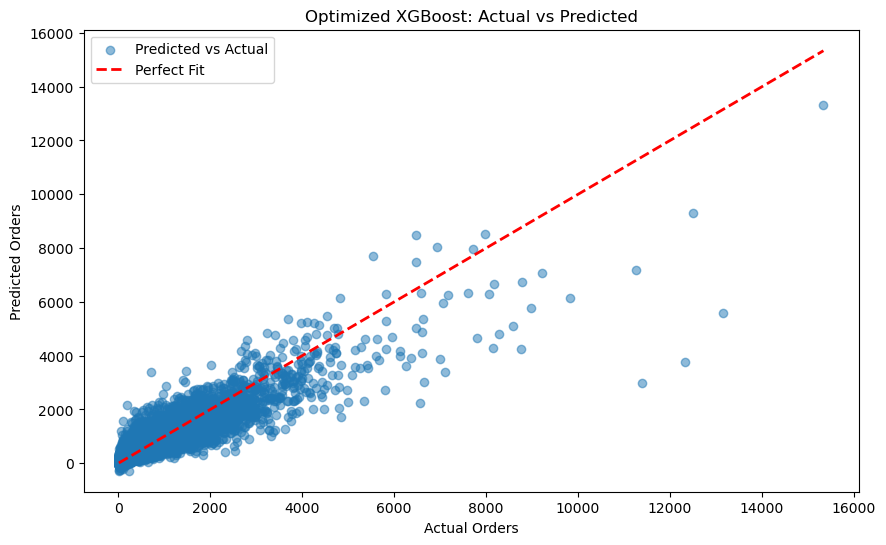

In [41]:
# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_xgb_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.title('Optimized XGBoost: Actual vs Predicted')
plt.legend()
plt.show()


Optimized XGBoost MAPE: 60.34%


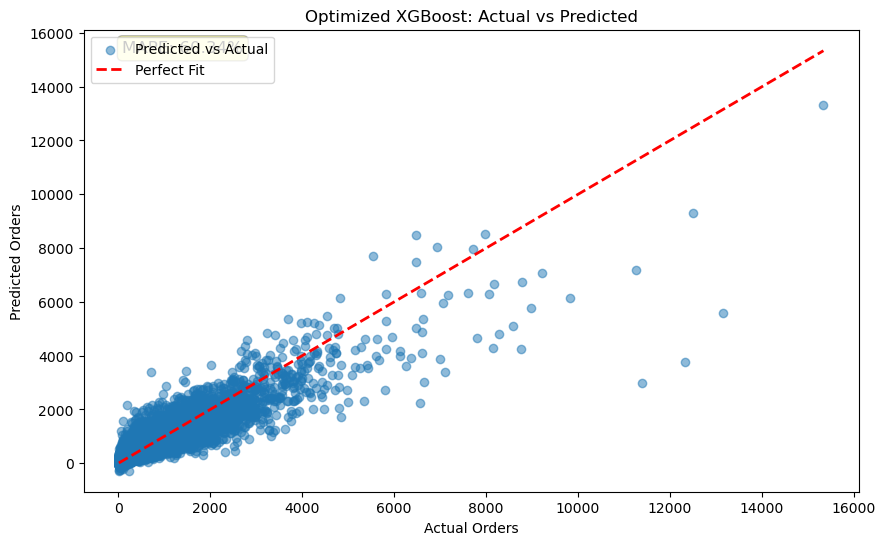

In [43]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
optimized_xgb_mape = mean_absolute_percentage_error(y_test, optimized_xgb_pred) * 100

# Print MAPE
print(f"Optimized XGBoost MAPE: {optimized_xgb_mape:.2f}%")

# Update the plot with MAPE as an annotation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_xgb_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.title('Optimized XGBoost: Actual vs Predicted')
plt.annotate(f'MAPE: {optimized_xgb_mape:.2f}%', 
             xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))
plt.legend()
plt.show()


lets drop the prices and check